In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [9]:
df.shape

(8950, 18)

In [10]:
df.isnull().sum()   #Null values present in data set

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Drop rows with NaN values

df = df.dropna() 
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [12]:
df.isna().sum()
 

index                               0
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             8636 non-null   int64  
 1   CUST_ID                           8636 non-null   object 
 2   BALANCE                           8636 non-null   float64
 3   BALANCE_FREQUENCY                 8636 non-null   float64
 4   PURCHASES                         8636 non-null   float64
 5   ONEOFF_PURCHASES                  8636 non-null   float64
 6   INSTALLMENTS_PURCHASES            8636 non-null   float64
 7   CASH_ADVANCE                      8636 non-null   float64
 8   PURCHASES_FREQUENCY               8636 non-null   float64
 9   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 10  PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 11  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 12  CASH_A

In [63]:
#Converted Flaot to int
df = df.astype({ "BALANCE":'int',"BALANCE_FREQUENCY":'int',"PURCHASES":'int',"ONEOFF_PURCHASES":'int',"INSTALLMENTS_PURCHASES":'int',"CASH_ADVANCE":'int',"PURCHASES_FREQUENCY":'int',"ONEOFF_PURCHASES_FREQUENCY":'int',"PURCHASES_INSTALLMENTS_FREQUENCY":'int',"CASH_ADVANCE_FREQUENCY":'int',"CREDIT_LIMIT":'int',"PAYMENTS":'int',"MINIMUM_PAYMENTS":'int',"PRC_FULL_PAYMENT":'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   index                             8636 non-null   int64 
 1   CUST_ID                           8636 non-null   object
 2   BALANCE                           8636 non-null   int64 
 3   BALANCE_FREQUENCY                 8636 non-null   int64 
 4   PURCHASES                         8636 non-null   int64 
 5   ONEOFF_PURCHASES                  8636 non-null   int64 
 6   INSTALLMENTS_PURCHASES            8636 non-null   int64 
 7   CASH_ADVANCE                      8636 non-null   int64 
 8   PURCHASES_FREQUENCY               8636 non-null   int64 
 9   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   int64 
 10  PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   int64 
 11  CASH_ADVANCE_FREQUENCY            8636 non-null   int64 
 12  CASH_ADVANCE_TRX    

In [64]:
df.describe()

,index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,4476.918828,1600.729157,0.709819,1025.099352,604.687934,420.601783,993.932723,0.246179,0.054308,0.150185,0.003705,3.313918,15.033233,4522.090551,1783.974294,863.806392,0.056508,11.534391
std,2565.759792,2095.571733,0.453872,2167.044303,1684.218071,917.152767,2121.339566,0.430809,0.226637,0.357274,0.060763,6.912506,25.180468,3659.240335,2909.808069,2372.568089,0.230913,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,2266.750000,147.750000,0.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.000000,169.000000,0.000000,12.000000
50%,4468.500000,916.000000,1.000000,375.000000,44.500000,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3000.000000,896.500000,312.000000,0.000000,12.000000
75%,6697.250000,2104.250000,1.000000,1145.250000,598.250000,484.000000,1131.500000,0.000000,0.000000,0.000000,0.000000,4.000000,18.000000,6500.000000,1951.000000,825.000000,0.000000,12.000000
max,8949.000000,19043.000000,1.000000,49039.000000,40761.000000,22500.000000,47137.000000,1.000000,1.000000,1.000000,1.000000,123.000000,358.000000,30000.000000,50721.000000,76406.000000,1.000000,12.000000


In [65]:
df1=df.iloc[:,2:]
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40,0,95,0,95,0,0,0,0,0,0,2,1000,201,139,0,12
1,3202,0,0,0,0,6442,0,0,0,0,4,0,7000,4103,1072,0,12
2,2495,1,773,773,0,0,1,1,0,0,0,12,7500,622,627,0,12
3,817,1,16,16,0,0,0,0,0,0,0,1,1200,678,244,0,12
4,1809,1,1333,0,1333,0,0,0,0,0,0,8,1800,1400,2407,0,12


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f400ebff790>]],
      dtype=object)

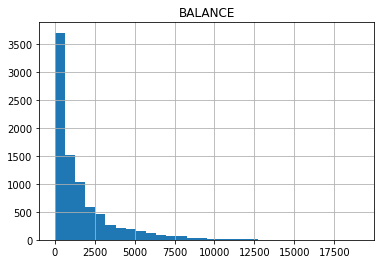

In [17]:
#Performing EDA  ,finding Average Balance of customer,only 2500 customer have balance of more than $500
df.hist(column='BALANCE',bins=30)    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f400d6f03d0>]],
      dtype=object)

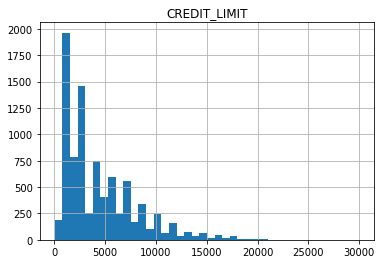

In [18]:
df.hist(column='CREDIT_LIMIT',bins=40)  #Most of the customer fall under 5000$ credit limit

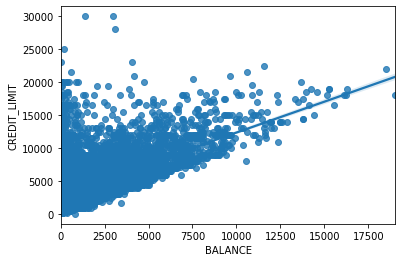

In [19]:
sns.regplot(data=df, x="BALANCE", y="CREDIT_LIMIT")  #Linear relation ship between Balance and Credit Limit

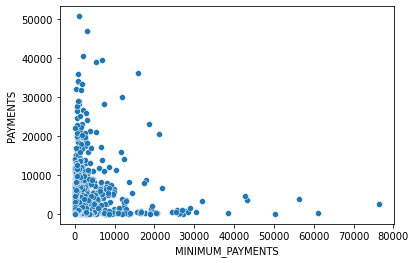

In [20]:
sns.scatterplot(x="MINIMUM_PAYMENTS", y="PAYMENTS", data=df1)  #most of the payments are under $10000

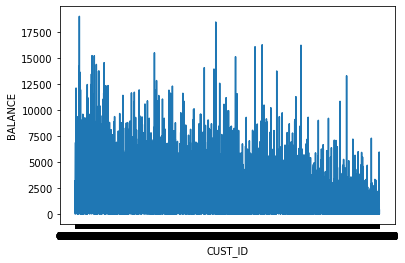

In [21]:
sns.histplot(data=df, x="CUST_ID", y="BALANCE",hue="CREDIT_LIMIT")  #Balance of every customer,observing decreasing trend in Balance in last customers

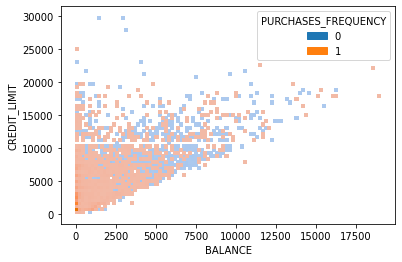

In [23]:
sns.histplot(data=df1, x="BALANCE", y="CREDIT_LIMIT", hue="PURCHASES_FREQUENCY") 

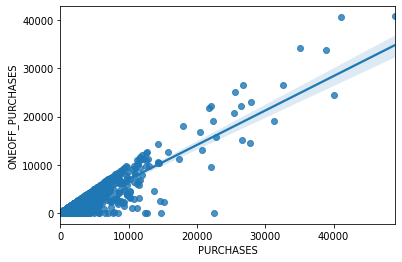

In [43]:
sns.regplot(data=df, x="PURCHASES", y="ONEOFF_PURCHASES")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


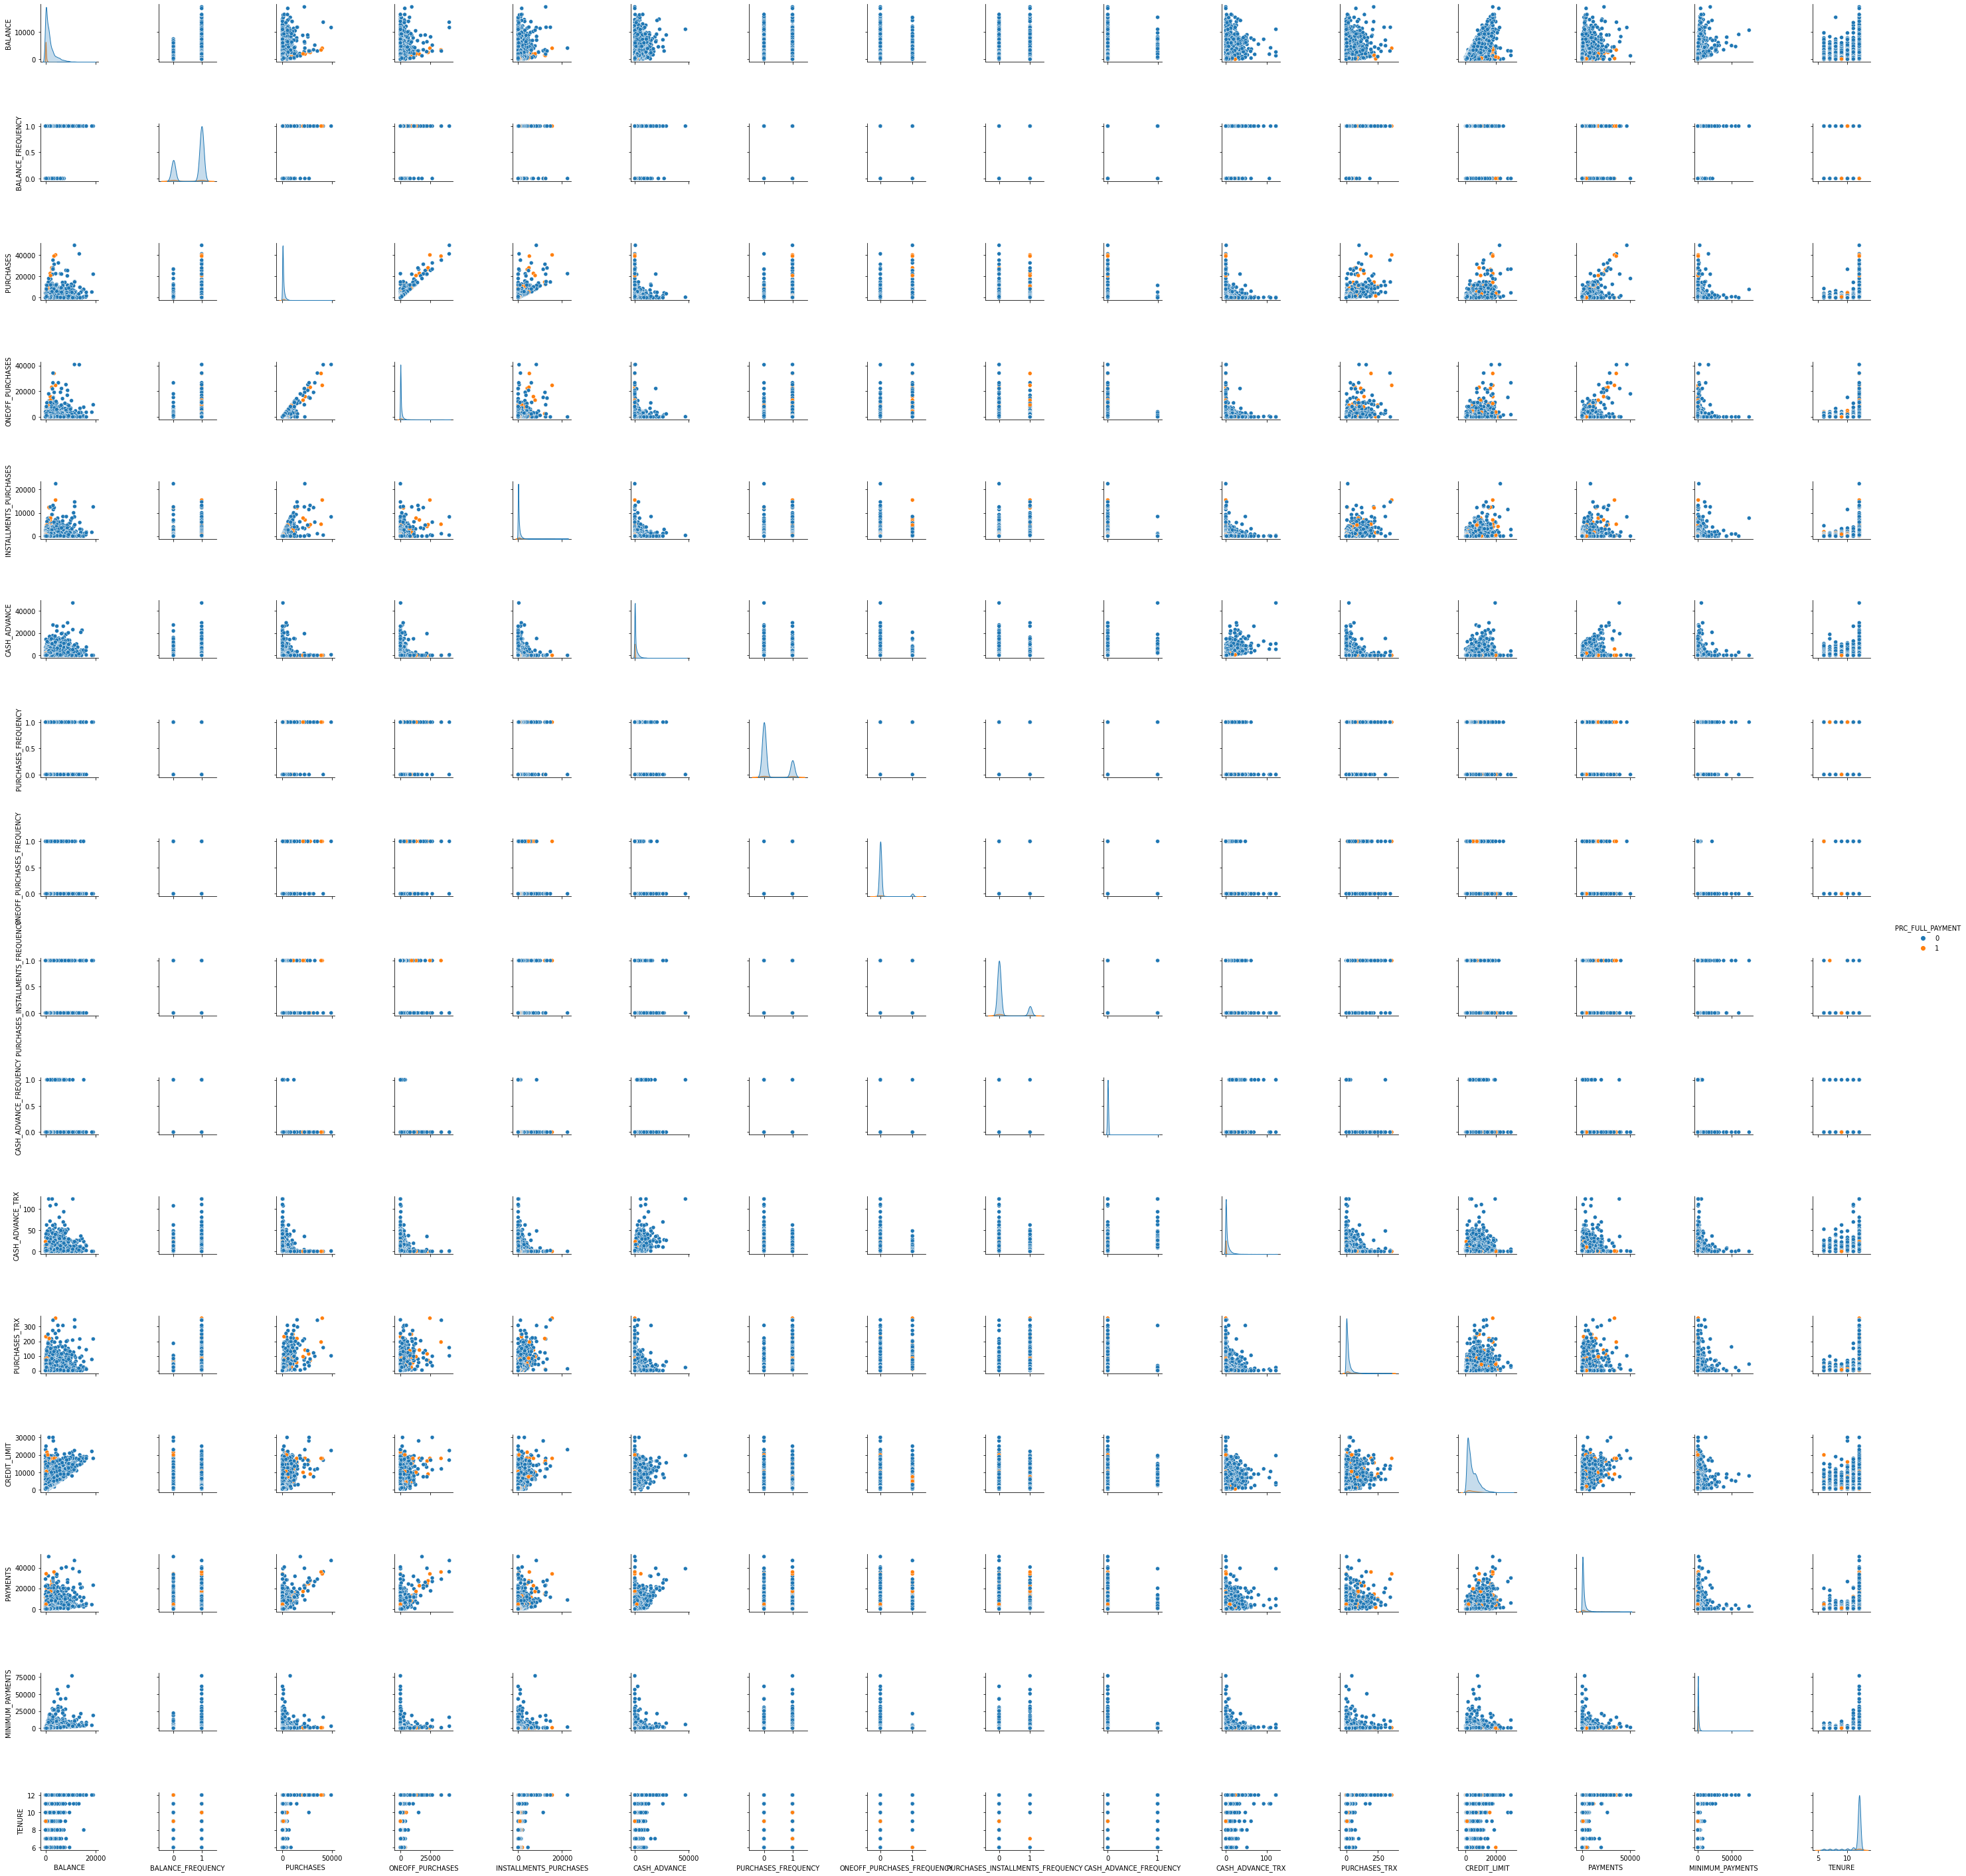

In [25]:
sns.pairplot(data=df1,hue="PRC_FULL_PAYMENT")   

In [106]:
#we will implement clustering model based on balance and credit limit
X = df1.iloc[:,[0,12]].values
X

array([[  40, 1000],
       [3202, 7000],
       [2495, 7500],
       ...,
       [  23, 1000],
       [  13,  500],
       [ 372, 1200]])

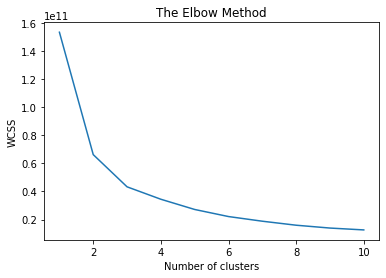

In [107]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [108]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)   #observations are from 5 cluster
y_kmeans = kmeans.fit_predict(X)

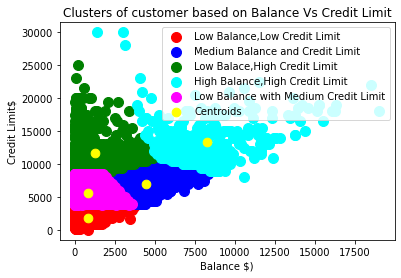

In [127]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Low Balance,Low Credit Limit')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Medium Balance and Credit Limit')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Balace,High Credit Limit')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'High Balance,High Credit Limit')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Low Balance with Medium Credit Limit')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customer based on Balance Vs Credit Limit')
plt.xlabel('Balance $)')
plt.ylabel('Credit Limit$')
plt.legend()
plt.show()

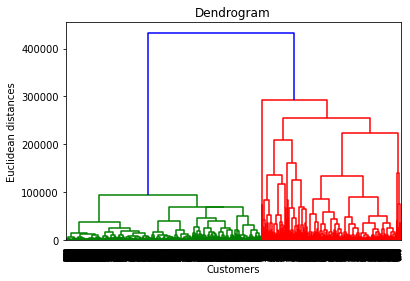

In [110]:
#Hierarchical CLustering

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df1, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()               #Calculating Denrograms to confirm cluster



In [114]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df1)

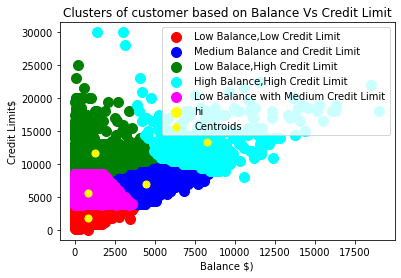

In [126]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Low Balance,Low Credit Limit')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Medium Balance and Credit Limit')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Low Balace,High Credit Limit')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'High Balance,High Credit Limit')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Low Balance with Medium Credit Limit')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'hi')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customer based on Balance Vs Credit Limit')
plt.xlabel('Balance $)')
plt.ylabel('Credit Limit$')
plt.legend()
plt.show()